# 🔰 Logistic Regression
Features : All

Target : Outcome
> diabetes.csv




In [216]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [217]:
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [218]:
# features and target
x1 = df.drop('Outcome',axis = 1).values
y = df['Outcome'].values.reshape(-1,1)

x1_mean = x1.mean(axis=0)
x1_std = x1.std(axis=0)
x1 = (x1 - x1_mean) / x1_std

# Adding bias term (column of ones)
x = np.hstack((np.ones((x1.shape[0], 1)), x1))

In [219]:
m,n = x.shape

In [220]:
# sigmoid fn
def sigmoid(z):
  z = np.clip(z,-500,500)
  return 1/(1+np.exp(-z))

In [221]:
# the hyperparameters
theta = np.zeros((n,1))
lr = 0.01
steps = 1000
cost_list = []

In [222]:
# Gradient Descent loop
for i in range(steps):
  z = x @ theta
  h = sigmoid(z)
  gradient = (1/m)*(x.T @ (h-y))
  theta = theta - (lr * gradient)

  # max likelihood...cost fn
  eps = 1e-8
  cost = (-1/m)*np.sum((y*np.log(h + eps))+ ((1-y)*np.log(1-h+eps)))
  cost_list.append(cost)

  print(f"step {i} | theta = {theta.ravel()} | cost = {cost:.4f}")

step 0 | theta = [-0.00151042  0.00105766  0.00222392  0.00031014  0.0003563   0.00062224
  0.0013951   0.00082861  0.0011361 ] | cost = 0.6931
step 1 | theta = [-0.00301706  0.00211049  0.00443944  0.00061622  0.00070934  0.00123987
  0.00278417  0.00165341  0.00226624] | cost = 0.6919
step 2 | theta = [-0.00451993  0.00315852  0.00664662  0.00091825  0.00105914  0.00185292
  0.00416724  0.00247441  0.00339046] | cost = 0.6906
step 3 | theta = [-0.00601905  0.00420177  0.00884547  0.00121626  0.00140572  0.00246139
  0.00554433  0.00329163  0.00450877] | cost = 0.6893
step 4 | theta = [-0.00751442  0.00524027  0.01103605  0.00151028  0.00174911  0.00306534
  0.00691548  0.00410509  0.00562121] | cost = 0.6881
step 5 | theta = [-0.00900605  0.00627403  0.01321838  0.00180034  0.00208933  0.00366477
  0.00828071  0.00491481  0.0067278 ] | cost = 0.6868
step 6 | theta = [-0.01049396  0.00730308  0.01539251  0.00208646  0.00242639  0.00425972
  0.00964007  0.00572081  0.00782859] | cost =

In [223]:
# prediction on training set
train_prob = sigmoid(x @ theta)
y_pred = (train_prob>=0.5).astype(int)

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128128 (\N{SKULL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


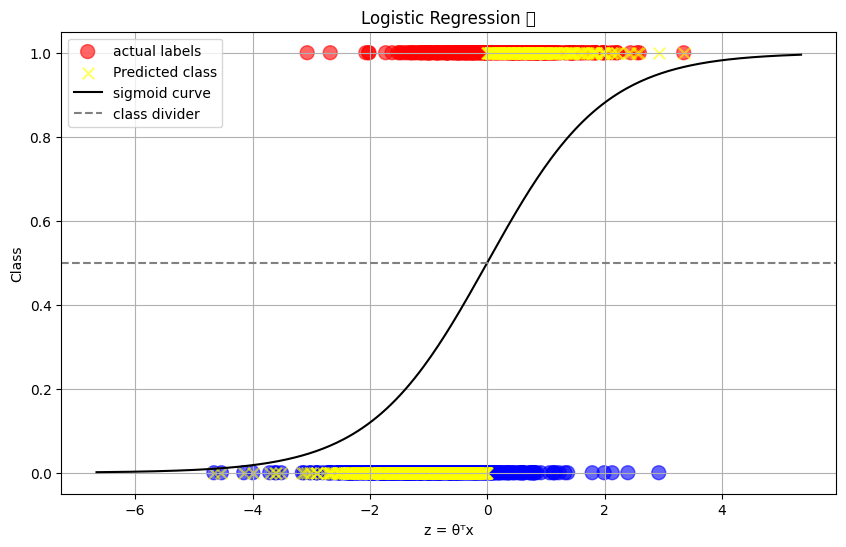

In [224]:
# training plot curve
z_train = x @ theta

plt.figure(figsize=(10, 6))
# plotting actual labels
plt.scatter(z_train,y.ravel(),c = y.ravel(),cmap = 'bwr',s = 100, label = 'actual labels',alpha = 0.6)
# plotting predicted class
plt.scatter(z_train, y_pred.ravel(), marker = 'x',color='yellow', s = 70, label = 'Predicted class',alpha = 0.6)

# plotting the sigmoid curve
z_vals = np.linspace(z_train.min()-2, z_train.max()+2, 300)
sigmoid_curve = sigmoid(z_vals)
plt.plot(z_vals, sigmoid_curve, color = 'black', label = "sigmoid curve")

# descision bounndry line
plt.axhline(0.5,linestyle = '--',color = 'grey',label = 'class divider')


plt.xlabel('z = θᵀx')
plt.ylabel('Class')
plt.title('Logistic Regression 💀')
plt.grid(True)
plt.legend()
plt.show()


In [225]:
TP = np.sum((y_pred == 1) & (y == 1))
TN = np.sum((y_pred == 0) & (y == 0))
FP = np.sum((y_pred == 1) & (y == 0))
FN = np.sum((y_pred == 0) & (y == 1))

accuracy = (TP + TN) / m
precision = TP / (TP + FP + 1e-8)
recall = TP / (TP + FN + 1e-8)
f1 = 2 * precision * recall / (precision + recall + 1e-8)

print(f"\nAccuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")


Accuracy: 0.7695
Precision: 0.7116
Recall: 0.5709
F1 Score: 0.6335


In [229]:
# User input prediction
user_values = []
for col in df.columns[:-1]:
    if col == 'DiabetesPedigreeFunction':
        print("For family history of diabetes:")
        print("1. No one in my family has diabetes.")
        print("2. One parent or sibling has diabetes.")
        print("3. Multiple parents or siblings have diabetes.")
        print("4. Only extended family (e.g., grandparents, aunts, uncles) has diabetes.")
        choice = input("Select an option (1-4): ")
        if choice == '1':
            value = 0.2
        elif choice == '2':
            value = 0.5
        elif choice == '3':
            value = 1.0
        elif choice == '4':
            value = 0.4
        else:
            print("Invalid choice, using default value (0.47).")
            value = 0.47
        lifestyle = input("Are you and your immediate family health-conscious (e.g., regular exercise, healthy diet)? (Yes/No): ").lower()
        if lifestyle == 'yes':
            value *= 0.7
            print("Since you're health-conscious, we've lowered the genetic risk score.")
    else:
        value = float(input(f'{col}: '))
    user_values.append(value)


# Normalize user input using training data's mean and std
user_values = np.array(user_values)
user_values_norm = (user_values - x1_mean) / x1_std
user_input = np.hstack(([1], user_values_norm))
user_z = np.dot(user_input, theta)
user_prob = sigmoid(user_z)[0]

print('Predicted probability of being Diabetic:', user_prob)
print('Prediction: Diabetic 🔴' if user_prob >= 0.5 else "Prediction: Non-Diabetic 🟢")
print("Note: This prediction is based on general data and family history. If you and your family are health-conscious, your actual risk of diabetes may be lower than predicted. Please consult a doctor for a personalized assessment.")

Pregnancies: 3
Glucose: 155
BloodPressure: 78
SkinThickness: 32
Insulin: 130
BMI: 33.5
For family history of diabetes:
1. No one in my family has diabetes.
2. One parent or sibling has diabetes.
3. Multiple parents or siblings have diabetes.
4. Only extended family (e.g., grandparents, aunts, uncles) has diabetes.
Select an option (1-4): 3
Are you and your immediate family health-conscious (e.g., regular exercise, healthy diet)? (Yes/No): Yes
Since you're health-conscious, we've lowered the genetic risk score.
Age: 48
Predicted probability of being Diabetic: 0.6498816941276511
Prediction: Diabetic 🔴
Note: This prediction is based on general data and family history. If you and your family are health-conscious, your actual risk of diabetes may be lower than predicted. Please consult a doctor for a personalized assessment.


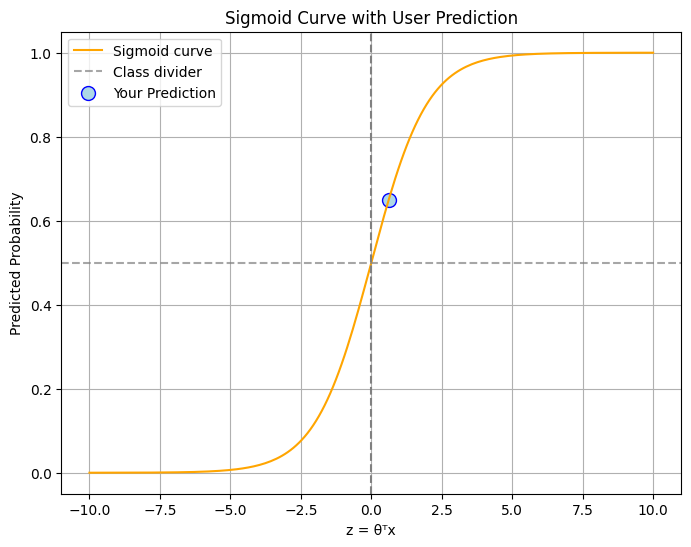

In [230]:
z_vals = np.linspace(-10,10,200)
prob_vals = sigmoid(z_vals)

plt.figure(figsize=(8,6))
plt.plot(z_vals,prob_vals, label = 'Sigmoid curve',color = 'orange')
plt.axhline(0.5, linestyle = '--',color = 'grey', label = 'Class divider', alpha = 0.7)
plt.axvline(0, linestyle = '--',color = 'grey')
plt.scatter(user_z,user_prob, color = 'lightblue',edgecolor = 'blue',s = 100, label = 'Your Prediction')
plt.title("Sigmoid Curve with User Prediction")
plt.xlabel("z = θᵀx")
plt.ylabel("Predicted Probability")
plt.legend()
plt.grid(True)
plt.show()